# Assignment 5: Exploratory Data Analysis and Hypothesis Testing

**Student:** [Your Name Here]  
**Dataset:** [Choose one: Air Quality, Adult Income, Heart Disease, Online Shoppers, or Solar Flare]  
**Date:** [Current Date]

## Objective
Perform exploratory data analysis (EDA) and hypothesis testing on your chosen dataset. Identify patterns and test meaningful hypotheses about relationships between variables.

---


## 1. Import Data and Libraries

Import the necessary libraries and load your dataset.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
# Load your dataset here
# Replace this with your actual data loading code
# Example for Heart Disease dataset:
# df = pd.read_csv('heart_disease.csv')

# For this template, I'll create a simple example dataset
np.random.seed(42)
n = 200

# Create sample data (replace with your actual dataset)
data = {
    'age': np.random.normal(50, 15, n),
    'income': np.random.normal(50000, 20000, n),
    'education': np.random.choice(['High School', 'College', 'Graduate'], n),
    'target': np.random.choice([0, 1], n, p=[0.6, 0.4])
}

df = pd.DataFrame(data)
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (200, 4)


,age,income,education,target
0,57.450712,57155.747207,Graduate,0
1,47.926035,61215.690527,Graduate,0
2,59.715328,71661.024864,High School,1
3,72.845448,71076.041041,High School,0
4,46.487699,22446.612641,Graduate,0


## 2. Exploratory Data Analysis (EDA)

Explore your dataset to understand its structure and identify patterns.


In [3]:
# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nBasic statistics:")
df.describe()


=== DATASET OVERVIEW ===
Shape: (200, 4)

Data types:
age          float64
income       float64
education     object
target         int64
dtype: object

Missing values:
age          0
income       0
education    0
target       0
dtype: int64

Basic statistics:


,age,income,target
count,200.000000,200.000000,200.000000
mean,49.388436,51717.363738,0.390000
std,13.965059,19740.076220,0.488974
min,10.703823,-14825.346801,0.000000
25%,39.423085,37883.249244,0.000000
50%,49.937122,51576.786976,0.000000
75%,57.512787,63744.622814,1.000000
max,90.802537,127054.629813,1.000000


=== TARGET VARIABLE ===
Target distribution:
target
0    122
1     78
Name: count, dtype: int64


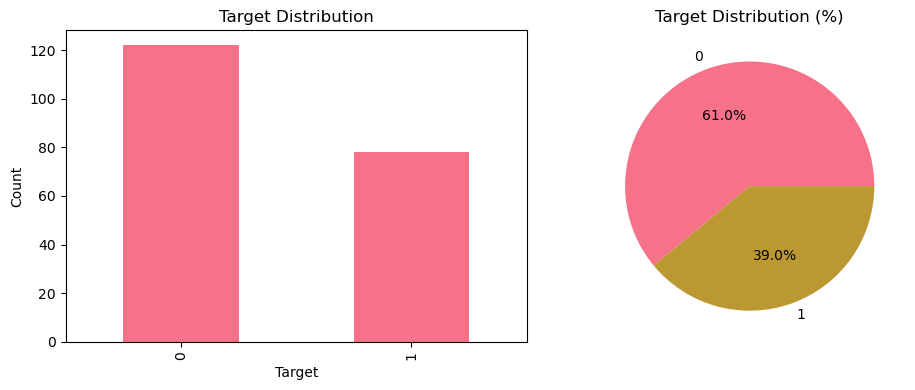

In [4]:
# Target variable analysis
print("=== TARGET VARIABLE ===")
target_counts = df['target'].value_counts()
print(f"Target distribution:")
print(target_counts)

# Visualize target distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
target_counts.plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%')
plt.title('Target Distribution (%)')

plt.tight_layout()
plt.show()


=== NUMERICAL VARIABLES ===
Numerical columns: ['age', 'income', 'target']


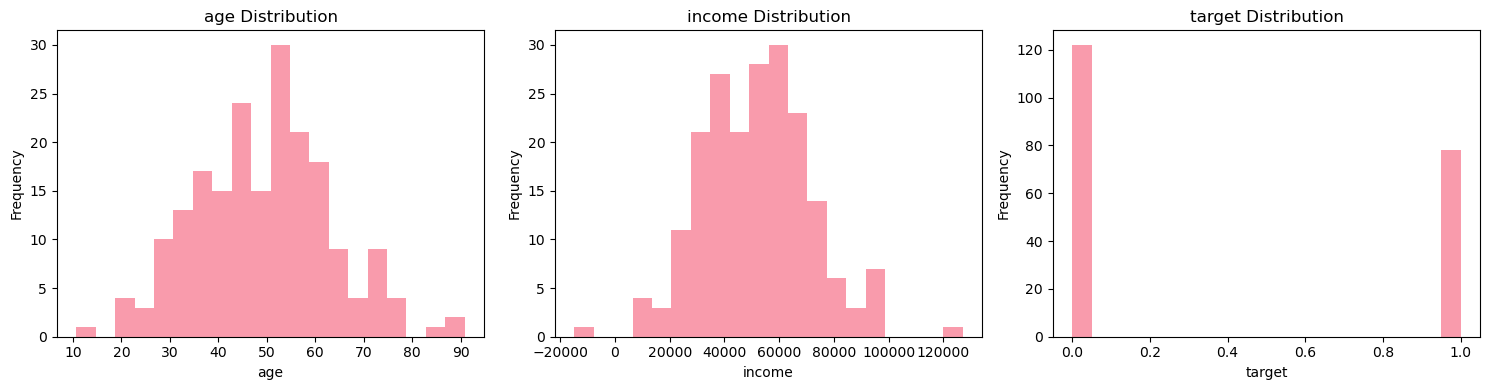

In [5]:
# Numerical variables analysis
print("=== NUMERICAL VARIABLES ===")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {list(numerical_cols)}")

# Create histograms for numerical variables
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(5*len(numerical_cols), 4))
if len(numerical_cols) == 1:
    axes = [axes]

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=20, alpha=0.7)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


=== CATEGORICAL VARIABLES ===
Categorical columns: ['education']

education value counts:
education
College        68
Graduate       66
High School    66
Name: count, dtype: int64


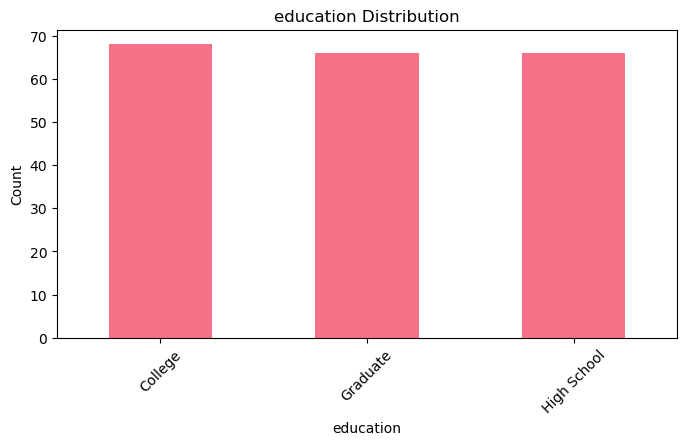

In [6]:
# Categorical variables analysis
print("=== CATEGORICAL VARIABLES ===")
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {list(categorical_cols)}")

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())
    
    # Create bar plot
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


In [7]:
# Correlation analysis
print("=== CORRELATION ANALYSIS ===")
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Show correlations with target variable
if 'target' in df.columns:
    target_correlations = correlation_matrix['target'].sort_values(ascending=False)
    print("\nCorrelations with target variable:")
    print(target_correlations)


=== CORRELATION ANALYSIS ===


ValueError: could not convert string to float: 'Graduate'

In [ ]:
# Relationship between variables and target
print("=== RELATIONSHIPS WITH TARGET ===")

# Box plots for numerical variables vs target
numerical_cols_no_target = [col for col in numerical_cols if col != 'target']

if len(numerical_cols_no_target) > 0:
    fig, axes = plt.subplots(1, len(numerical_cols_no_target), figsize=(5*len(numerical_cols_no_target), 4))
    if len(numerical_cols_no_target) == 1:
        axes = [axes]
    
    for i, col in enumerate(numerical_cols_no_target):
        df.boxplot(column=col, by='target', ax=axes[i])
        axes[i].set_title(f'{col} by Target')
        axes[i].set_xlabel('Target')
        axes[i].set_ylabel(col)
    
    plt.tight_layout()
    plt.show()

# Crosstabs for categorical variables vs target
for col in categorical_cols:
    print(f"\n{col} vs Target:")
    crosstab = pd.crosstab(df[col], df['target'], normalize='index')
    print(crosstab.round(3))


## 3. Hypothesis Formulation

Based on your EDA, formulate **2-3 testable hypotheses**. Each hypothesis should be:
- Clear and specific
- Testable with statistical methods
- Grounded in your observations

### Hypothesis 1: [Your first hypothesis]
**H1:** [State your hypothesis]
- **Null Hypothesis (H0):** [State null hypothesis]
- **Alternative Hypothesis (H1):** [State alternative hypothesis]
- **Rationale:** [Explain why you think this relationship exists]

### Hypothesis 2: [Your second hypothesis]
**H2:** [State your hypothesis]
- **Null Hypothesis (H0):** [State null hypothesis]
- **Alternative Hypothesis (H1):** [State alternative hypothesis]
- **Rationale:** [Explain why you think this relationship exists]

### Hypothesis 3: [Your third hypothesis - optional]
**H3:** [State your hypothesis]
- **Null Hypothesis (H0):** [State null hypothesis]
- **Alternative Hypothesis (H1):** [State alternative hypothesis]
- **Rationale:** [Explain why you think this relationship exists]

---


## 4. Hypothesis Testing

Test each hypothesis using appropriate statistical methods. For each test, explain:
- Why you chose this test
- The results and interpretation
- Whether you reject or fail to reject the null hypothesis


### Testing Hypothesis 1: [Your first hypothesis]

**Test Choice:** [t-test, chi-square, correlation, etc.]
- **Why appropriate:** [Explain why this test is suitable for your data and hypothesis]


In [ ]:
# Hypothesis 1 Testing
print("=== TESTING HYPOTHESIS 1 ===")

# Your code for testing hypothesis 1 here
# Example structure:
# 1. Prepare your data
# 2. Check assumptions if needed
# 3. Perform the statistical test
# 4. Interpret results

# Example for t-test:
# group1 = df[df['condition'] == 0]['variable']
# group2 = df[df['condition'] == 1]['variable']
# t_stat, p_value = stats.ttest_ind(group1, group2)
# print(f"t-statistic: {t_stat:.4f}")
# print(f"p-value: {p_value:.4f}")
# 
# if p_value < 0.05:
#     print("Reject H0: There is a significant difference")
# else:
#     print("Fail to reject H0: No significant difference")

print("Replace this with your actual hypothesis 1 testing code")


### Testing Hypothesis 2: [Your second hypothesis]

**Test Choice:** [t-test, chi-square, correlation, etc.]
- **Why appropriate:** [Explain why this test is suitable for your data and hypothesis]


In [ ]:
# Hypothesis 2 Testing
print("=== TESTING HYPOTHESIS 2 ===")

# Your code for testing hypothesis 2 here
# Example for chi-square test:
# contingency_table = pd.crosstab(df['var1'], df['var2'])
# chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
# print(f"Chi-square statistic: {chi2:.4f}")
# print(f"p-value: {p_value:.4f}")
# 
# if p_value < 0.05:
#     print("Reject H0: Variables are significantly associated")
# else:
#     print("Fail to reject H0: No significant association")

print("Replace this with your actual hypothesis 2 testing code")


### Testing Hypothesis 3: [Your third hypothesis - if applicable]

**Test Choice:** [t-test, chi-square, correlation, etc.]
- **Why appropriate:** [Explain why this test is suitable for your data and hypothesis]


In [ ]:
# Hypothesis 3 Testing (if applicable)
print("=== TESTING HYPOTHESIS 3 ===")

# Your code for testing hypothesis 3 here
print("Replace this with your actual hypothesis 3 testing code")


## 5. Summary and Conclusions

### Key Findings from EDA:
1. [List your main observations from the exploratory analysis]
2. [Describe patterns you identified]
3. [Note any interesting relationships]

### Hypothesis Testing Results:

| Hypothesis | Test Used | p-value | Result | Interpretation |
|------------|-----------|---------|--------|-----------------|
| **H1** | [Test name] | [p-value] | [Significant/Not] | [Brief interpretation] |
| **H2** | [Test name] | [p-value] | [Significant/Not] | [Brief interpretation] |
| **H3** | [Test name] | [p-value] | [Significant/Not] | [Brief interpretation] |

### Key Insights:
- [What do your results tell you about the data?]
- [What are the practical implications?]
- [What limitations should be considered?]

### Future Research:
- [What additional analysis could be done?]
- [What other variables might be important?]

---

**Note:** Remember to replace the sample data with your actual dataset and fill in all the template sections with your own analysis and interpretations.


In [ ]:
# Final summary
print("=== ANALYSIS COMPLETE ===")
print(f"Dataset analyzed: [Your dataset name]")
print(f"Sample size: {len(df)} observations")
print(f"Number of features: {df.shape[1]-1} (excluding target)")
print(f"\nAnalysis completed successfully!")
print("\nRemember to:")
print("1. Replace sample data with your actual dataset")
print("2. Fill in all template sections with your analysis")
print("3. Provide clear explanations for your choices")
print("4. Interpret your results meaningfully")
